In [ ]:
x,y가 잇으면 지도학습   > f(x)를 예측
y가 없으면 비지도  >  x의 군집도를 분석



In [ ]:
데이터준비및분석
- 숫자로 데이터를 변경 -라벨인코더

In [1]:
l=[1,2,3,4]
l2=[4,5,6,7]
zip(l,l2)


In [2]:
l=[1,2,3,4]
l2=[4,5,6,7]
list(zip(l,l2))


[(1, 4), (2, 5), (3, 6), (4, 7)]

In [4]:
l=[1,2,3,4]
l2=[4,5,6,7]
l3=[1,2,3,4]

list(zip(l,l2,l3))


[(1, 4, 1), (2, 5, 2), (3, 6, 3), (4, 7, 4)]

In [ ]:
데이터품질문제
    데이터분포의지나친차이
    기수형데이터와서수형데이터
    결측치
    이상치

데이터분포의지나친차이
    데이터가연속형값인데최댓값과최솟값차이가피처보다더많이나는경우
    학습에영향을줄수잇기떄문에데이터의스케일을맞춰줌
    데이터의최댓값과최솟값을영에서일사이값으로바꾸거나표준정규분포형태로나타내는등

In [ ]:
결측치처리하기
    드롭
    채우기
        데이터를 삭제하거나 데이터를채움
        데이터가없으면해당행이나열을삭제
    평균값최빈값중간값등으로 데이어틀 채움
    결측치를 확인할 떄 이스널함수사용
        난값이존재할경우투루아닐경우폴스출력
        섬함수로트루인경우모두더하고전체데이터개수로나누어열별데이터결측치비율을구함

In [ ]:
채우기 fill   결측치처리법

~~.fillna 

In [5]:
import pandas as pd
df=pd.DataFrame({'점수':[0,1,2],'타겟':[2,2,3],'무게':[3,4,5],'색상':['빨강','파랑','파랑']})
df

,점수,타겟,무게,색상
0,0,2,3,빨강
1,1,2,4,파랑
2,2,3,5,파랑


In [13]:
무게_정보={3:'소',4:'중',5:'대'}
df['무게정보']=df['무게'].map(무게_정보)
t_df=pd.get_dummies(df['무게정보'])

print(t_df)
t_df_1=pd.concat([df,t_df],axis=1)
t_df_1

   대  소  중
0  0  1  0
1  0  0  1
2  1  0  0


,점수,타겟,무게,색상,무게정보,대,소,중
0,0,2,3,빨강,소,0,1,0
1,1,2,4,파랑,중,0,0,1
2,2,3,5,파랑,대,1,0,0


In [8]:
del t_df_1 ['무게정보']
del t_df_1 ['무게']
t_df_1

,점수,타겟,색상,대,소,중
0,0,2,빨강,0,1,0
1,1,2,파랑,0,0,1
2,2,3,파랑,1,0,0


In [ ]:
# t_df2_color = pd.get_dummies(df_2['색상'])
# t_df2_color

# t_df_2 = pd.concat([t_df_1, t_df2_color], axis = 1)
# t_df_2.drop('색상', axis = 1, inplace = True)
# t_df_2

In [14]:
pd.get_dummies(t_df_1['색상'])

,빨강,파랑
0,1,0
1,0,1
2,0,1


In [16]:
pd.concat([t_df_1,pd.get_dummies(t_df_1['색상'])])

,점수,타겟,무게,색상,무게정보,대,소,중,빨강,파랑
0,0.0,2.0,3.0,빨강,소,0.0,1.0,0.0,NaN,NaN
1,1.0,2.0,4.0,파랑,중,0.0,0.0,1.0,NaN,NaN
2,2.0,3.0,5.0,파랑,대,1.0,0.0,0.0,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [17]:
pd.concat([t_df_1,pd.get_dummies(t_df_1['색상'])],axis=1)

,점수,타겟,무게,색상,무게정보,대,소,중,빨강,파랑
0,0,2,3,빨강,소,0,1,0,1,0
1,1,2,4,파랑,중,0,0,1,0,1
2,2,3,5,파랑,대,1,0,0,0,1


In [ ]:
pd.concat([t_df_1[[]]],pd.get_dummies(t_df_1['색상'])],axis=1)

In [20]:
t_df_1[['점수','타겟','대','중','소']]

,점수,타겟,대,중,소
0,0,2,0,0,1
1,1,2,0,1,0
2,2,3,1,0,0


In [21]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
            'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [ ]:
데이터 전처리

범주형데이터로변환하여처리하기
바인딩
    

In [25]:
bins=[0,25,50,75,100]
ck_data= ['F','C','B','A']
c_data=pd.cut(df.postTestScore,bins,labels=ck_data)
c_data

0     F
1     A
2     B
3     B
4     B
5     F
6     A
7     B
8     B
9     B
10    B
11    B
Name: postTestScore, dtype: category
Categories (4, object): ['F' < 'C' < 'B' < 'A']

In [ ]:
함수 cut           연속형데이터를 > 범주형데이터로 바꾸기          연속데이터-회귀     범주-분류
    bins리스트에 구간의시작값끝값을넣고구간의이름을리스트로나열
    컷 함수로나눌시리즈객체와구간,구간의이름을넣어주면해당값을바인딩하여표시해줌





In [ ]:
데이터의크기맞추기
    피쳐스케일링
스케일링scaling
    데이터간범위를맞춤
        몸무게와키를하나의모델에넣으면데이터의범위가훨씬넓어져키가몸무게에비해모델에과다하게영향을줌
x1과x2변수범위가다를떄하나의변수범위로통일시켜처리

스케일링
    엑스1과 엑스2 변수 범위가 다를 떄 하나의 변수 범위로 통일시켜 처리


In [ ]:
정규화

(인풋-최소)/(최대-최소)


In [29]:
import pandas as pd
df=pd.DataFrame({'data1':[5,30,25,46,55]},{'data2':[150,120,25,46,55]})
df

ValueError: ignored

In [ ]:
정규화

민맥스정규화
    (인풋-최소)/(최대-최소)''
 
제트스코어정규화
    (인풋-평균)/표준편차
        표쥰편차구하기 std()



In [ ]:
머신러닝 프로세스와 데이터전처리
    데이터를확보한후데이터를정제및전처리
    학습용과테스트데이터를나눠학습용데이터로학습을실수
    학습결과를평가지표와비교하여하이퍼매개변수변환
    최종적인모델생성하여테스트데이터셋으로성능을측정
    모델을시스템에배치하여모델을작동시킴
    

In [31]:
pd.read_csv('test.csv')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [34]:
import pandas as pd
pd.read_csv('test.csv')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [49]:
pd.read_csv('train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [59]:
import pandas as pd
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
#컨캣 합치기
df = pd.concat([df1,df2],sort=False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [61]:
df.reset_index(drop=True, inplace=True)  #인덱스리셋
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
기게학습 > 머신러닝<딥러닝>

In [63]:
#데이터용
import pandas as pd
import numpy as np
#시각화용
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
import pandas as pd
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
#컨캣 합치기
df = pd.concat([df1,df2],sort=False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
t_df=pd.read_csv('train.csv')
tt_df=pd.read_csv('test.csv')

In [70]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [65]:
#결측치제거
train_y = train_df.pop('Survived')  #트레인정답값
train_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [66]:
train_df  #서바이브드 제거됨

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [68]:
train_df.head(2).T     #헤드디폴트위에서부터5행 출력

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833
Cabin,NaN,C85


In [73]:
#전처리 - 데이터정제

#1결측치

#결측치 잇는지 확인

train_df.isnull().sum()
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [75]:
#전처리 - 데이터정제

#1결측치

#결측치 잇는지 확인

train_df.isnull().sum()/len(train_df)*100  #결측치의 비율을 보여준다   섬 합  에서 나누기 길이
train_df

SyntaxError: ignored

In [ ]:
#결측치
del tanin

In [ ]:
#2. 이상치



In [ ]:
# 3.데이터정리

In [ ]:
# 4.범위조정

In [ ]:
df[]

In [ ]:
데이터셋정리 - 테스트, 검증 ,학습

In [ ]:
모델생성-결정,생성등

In [ ]:
학습(지도.비지도.강화)

In [ ]:
테스트 및 검증

In [ ]:
모델완성

In [ ]:
#채우기

df['Age'].fillna(  평균구하는코드 )  #평균으로결측치채우기


In [76]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [78]:
df.info()l

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
oj_columns=['PassengerId','Pclass' ,'Name'  ,'Sex'  ,'Ticket' ,'Cabin'  ,  'Embarked'   ]
num_columns=['Age','SibSp'      ,'Parch'    ,  'Fare'      ]

for i in oj_columns:
    df[i]=df[i]=.astype(object)

for i in num_columns:
    df[i]=df[i]=.astype(float)

타입ㅍ바꾸기 ,astype 에스타이ㅏㅂ
.astype(int)
.astype('int32')

In [80]:
pd.get_dummies(df['Sex'],prefix='성별')  #원핫인코딩

,성별_female,성별_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [82]:
pd.get_dummies(df[['Sex']])  #원핫인코딩

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [ ]:
병합 ;    컨캣.             머지.


In [91]:
pd.merge(df,pd.get_dummies(df['Sex'],prefix='성별'), how='inner' , left_index=True, right_index=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,성별_female,성별_male
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [105]:
o_h_d = pd.merge(df,pd.get_dummies(df['Sex'],prefix='성별'), how='inner' , left_index=True, right_index=True)

In [106]:
o_h_d = pd.merge(o_h_d,pd.get_dummies(df['Pclass'],prefix='Pclass'), how='inner' , left_index=True, right_index=True)
o_h_d = pd.merge(o_h_d,pd.get_dummies(df['Embarked'],prefix='Embarked'), how='inner' , left_index=True, right_index=True)

In [107]:
o_h_d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,성별_female,성별_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,0,1
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,1,0
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,0,1
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,1,0
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0,1,0,1,0,0,0,1
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1,0,1,0,0,0,0,1
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1,0,0,0,1,0,0,1
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,1,1,0,0,1,0,0


In [103]:
train_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [118]:
pd.merge( df.Sex     ,    train_y , left_index=True, right_index=True)


,Sex,Survived
0,male,0
0,male,0
1,female,1
1,female,1
2,female,1
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [119]:
pd.merge( o_h_d.Sex     ,    train_y , left_index=True, right_index=True)


,Sex,Survived
0,male,0
0,male,0
0,male,0
0,male,0
0,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [121]:
# 서브코드 - 데이터시각화  
전달:내용전달이목적 
검토목적:가설검증목적
o_h_d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,성별_female,성별_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,0,1
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,1,0
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,0,1
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,1,0
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0,1,0,1,0,0,0,1
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1,0,1,0,0,0,0,1
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1,0,0,0,1,0,0,1
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,1,1,0,0,1,0,0


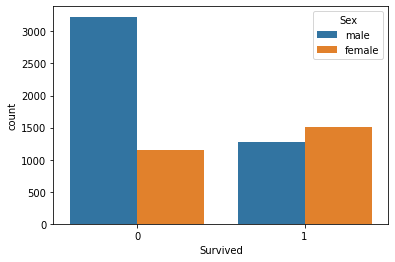

In [126]:
# 확인할 데이터 정리
pd.merge( o_h_d.Sex     ,    train_y , left_index=True, right_index=True)
import seaborn as sns
sns.countplot(x='Survived', hue='Sex',data=pd.merge( o_h_d.Sex     ,    train_y , left_index=True, right_index=True) )

In [ ]:
sns.countplot(x='Survived', hue='Sex',data=pd.merge( o_h_d.Sex     ,    train_y , left_index=True, right_index=True) )
plt.show()
sns.countplot(x='Survived', hue='Name',data=pd.merge( o_h_d.Name     ,    train_y , left_index=True, right_index=True) )
plt.show()
sns.countplot(x='Survived', hue='Embarked',data=pd.merge( o_h_d.Embarked     ,    train_y , left_index=True, right_index=True) )
plt.show()

In [ ]:
c_l=['Sex','Pclass','Embarked']
for i in c_l :
    sns.countplot(x='Survived', hue=i,data=pd.merge( o_h_d[i]     ,    train_y , left_index=True, right_index=True) )
    plt.show()



In [139]:
c_t_data=pd.merge( o_h_d[c_l]     ,    train_y , left_index=True, right_index=True) 
c_t_data


,Sex,Pclass,Embarked,Survived
0,male,3,S,0
0,male,3,S,0
0,male,3,S,0
0,male,3,S,0
0,male,3,S,0
...,...,...,...,...
886,male,2,S,0
887,female,1,S,1
888,female,3,S,0
889,male,1,C,1


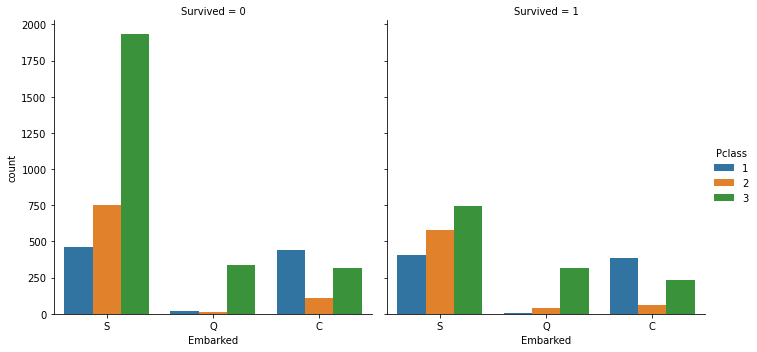

In [141]:
 sns.catplot(x='Embarked',hue='Pclass', col='Survived',kind='count', data=c_t_data)

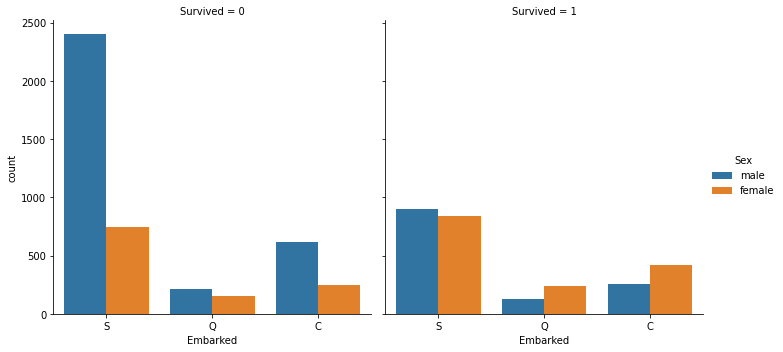

In [142]:
 sns.catplot(x='Embarked',hue='Sex', col='Survived',kind='count', data=c_t_data)

In [143]:
o_h_d.columns.tolist() 
#투리스트 리스트로바꾸기

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 '성별_female',
 '성별_male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [144]:
c_l

['Sex', 'Pclass', 'Embarked']

In [155]:
for i in o_h_d.columns.tolist():
    if i.split('_')[0] in c_l and    '_' in i:
        print(i, end=":")
        print(i.split('_')[0])

Pclass_1:Pclass
Pclass_2:Pclass
Pclass_3:Pclass
Embarked_C:Embarked
Embarked_Q:Embarked
Embarked_S:Embarked


In [158]:
go_l = [col_name for col_name in o_h_d.columns.tolist() if col_name.split('_')[0] in c_l and '_' in col_name]
go_l



['Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [162]:
o_h_d[go_l]



,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,0,1
0,0,0,1,0,1,0
0,0,0,1,0,0,1
0,0,0,1,0,1,0
0,0,0,1,0,0,1
...,...,...,...,...,...,...
886,0,1,0,0,0,1
887,1,0,0,0,0,1
888,0,0,1,0,0,1
889,1,0,0,1,0,0


In [ ]:
pd.merge

In [160]:
te_d corr()

SyntaxError: ignored

In [ ]:
범주형데이터 > 

원핫인코딩 범주형데이터의개수만큼가변수를생성하여존재유무를일또는영으로표현 잇냐없냐
  피쳐를 피처만큼늘려줌



In [168]:
sns.heatmap(te_d.corr(),annot=True)

NameError: ignored

In [ ]:
선형회귀

In [ ]:
직선 하나 긋기


선형회귀 linear regression

종속변수 와이와 한개이상의독립변수엑스와의 선형상관관계를 모델링하는 회귀분석기법
기존데이터를활용해연속형변수값을예측
와이는에이엑스플러스비꼴의수식을만들고에이와비의값을찾아냄

하나이상의 피처와 연속적인 타깃변수와이와이 사이의 관계를 모델링하는 것이 목적
지도학습의회귀는범주형클래스레이블이아니라연속적인출력값을예측

단순선형회귀
    단순선형회귀는 하나의 특성(엑스) 과 연속적인 타깃 (와이)사이의 관계를모델링
특성이 하나인선형모델공식은 다음과 같음 
    y=ax+b
    a는 특성의가중치 b는 와이절편
    특성과타깃사이의관계를 나타내는선형방정식의가중치를학습하는것이목적
    이방정식으로훈련데이터셋이아닌새로운샘플의타깃값을예측할수잇음

제곱오차를최소화해야한다
스퀘어에러

실제값-예측값 의 제곱   
시그마활용

비용함수의개념
비용함수 코스트펑션 으로 오차를 계산
    머신러닝에서최소화해야할예측값과실제값의차이
가설함수 선을 먼저 긋는 함수
    예측값을예측하는함수 - 선 먼저 긋는 것

weight 가중치를주다
[
 
 평균제곱오차 민스퀘어드에러 엠엣스이 잔차의제곱합을 이엠으로 나눈값

 arg min

 